In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import keras

Using TensorFlow backend.


In [2]:
raw_df = pd.read_csv('bitcoin_20190306.csv')

In [3]:
raw_df.head()

,close,high,low,open,time,volumefrom,volumeto
0,0.04951,0.04951,0.04951,0.04951,1279324800,20.00,0.9902
1,0.08584,0.08585,0.05941,0.04951,1279411200,75.01,5.0900
2,0.08080,0.09307,0.07723,0.08584,1279497600,574.00,49.6600
3,0.07474,0.08181,0.07426,0.08080,1279584000,262.00,20.5900
4,0.07921,0.07921,0.06634,0.07474,1279670400,575.00,42.2600


In [4]:
raw_df['time'] = pd.to_datetime(raw_df['time'], unit='s')

In [5]:
raw_df.head()

,close,high,low,open,time,volumefrom,volumeto
0,0.04951,0.04951,0.04951,0.04951,2010-07-17,20.00,0.9902
1,0.08584,0.08585,0.05941,0.04951,2010-07-18,75.01,5.0900
2,0.08080,0.09307,0.07723,0.08584,2010-07-19,574.00,49.6600
3,0.07474,0.08181,0.07426,0.08080,2010-07-20,262.00,20.5900
4,0.07921,0.07921,0.06634,0.07474,2010-07-21,575.00,42.2600


In [6]:
raw_df['raise'] = ( raw_df.close - raw_df.open ) / raw_df.open

In [7]:
raw_df['rs_status'] = raw_df['raise'].apply(lambda x: 1 if x>=0 else 0)

In [ ]:
raw_df.head()

In [ ]:
df.groupby('rs_status')['raise'].count()

----

In [8]:
# select data after 2017
df = raw_df[raw_df.time > '2017-01-01']

In [9]:
df.head()

,close,high,low,open,time,volumefrom,volumeto,raise,rs_status
2361,1017.05,1031.68,990.20,995.44,2017-01-02,64951.63,6.603807e+07,0.021709,1
2362,1033.30,1035.47,1006.53,1017.05,2017-01-03,54788.01,5.608587e+07,0.015978,1
2363,1135.41,1148.54,1022.32,1033.30,2017-01-04,156272.17,1.705846e+08,0.098819,1
2364,989.35,1150.63,874.53,1135.41,2017-01-05,240007.84,2.448393e+08,-0.128641,0
2365,886.16,1027.42,852.55,989.35,2017-01-06,194290.96,1.791607e+08,-0.104301,0


In [10]:
# target y (yl: close, yc:rs_status)
yl = np.array(df.close)
yc = np.array(df.rs_status)

In [11]:
# predictors X (['high', 'low', 'open', 'volumefrom', 'volumeto', 'raise'])
X = np.array(df[['high', 'low', 'open', 'volumefrom', 'volumeto', 'raise']])

----

## Model 1: Predict daily rasie status

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN,LSTM,Dense, Flatten, Reshape, Dropout

In [14]:
print('X.shape=', X.shape)
print('yc_shape=', yc.shape)

X.shape= (793, 6)
yc_shape= (793,)


In [15]:
num_train = 600
X_train = X[:num_train]
X_test = X[num_train:]

In [16]:
y_train = yc[:num_train]
y_test = yc[num_train:]

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[ 0.18670391,  0.29814593,  0.22386439, -1.07293816, -0.56159283,
         0.03448319],
       [ 0.18302297,  0.27318477,  0.23384104, -1.04804138, -0.55115683,
        -0.17785387],
       [ 0.21838997,  0.29570745,  0.22671766, -0.70968821, -0.3570422 ,
         0.50514244],
       ...,
       [-0.50537143, -0.45716989, -0.4774618 , -1.42992217, -0.83100016,
        -0.25276778],
       [-0.51058609, -0.4787902 , -0.48495713, -1.05478615, -0.71562517,
        -0.52484833],
       [-0.49594897, -0.47478692, -0.50478563, -1.04458158, -0.70890268,
         0.59726955]])

In [18]:
# 改變輸入為(?, ?, 1)
X_train = X_train.reshape((*X_train.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))
print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)

(600,) (600, 6, 1) (193,) (193, 6, 1)


In [19]:
y_train.shape

(600,)

----

### 1. simpleRNN model

In [12]:
# model 1
hidden_neurons=1

time_dim=6
seq_dim=1

# 建立模型(將SimpleRNN與Dense層依序添加至模型內)。
model = Sequential()  
model.add(SimpleRNN(input_shape=(time_dim,seq_dim), units=hidden_neurons, return_sequences=False))  
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.3) # 訓練模型。

In [ ]:
# 畫出模型訓練情形。
plt.plot(history.history['acc'],ms=5,marker='o',label='accuracy')
plt.plot(history.history['val_acc'],ms=5,marker='o',label='val accuracy')
plt.ylim(0,1)
plt.legend()
plt.show()

plt.plot(history.history['loss'],ms=5,marker='o',label='loss')
plt.plot(history.history['val_loss'],ms=5,marker='o',label='val loss')
plt.legend()
plt.ylim(0,)
plt.show()

In [ ]:
y_pred = pd.Series(model.predict(X_test)[:,0]).apply(lambda x:1 if x>0.5 else 0).values

In [ ]:
y_pred

In [ ]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)

----

### 2. RNN model (beta)

In [20]:
# model 2
hidden_neurons=32

time_dim=6
seq_dim=1

model = Sequential()  
model.add(SimpleRNN(input_shape=(time_dim,seq_dim), units=hidden_neurons, return_sequences=False))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
# model.add(Reshape((-1,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,429
Trainable params: 1,429
Non-trainable params: 0
_________________________________________________________________


In [21]:
history=model.fit(X_train, y_train, epochs=200, batch_size=128, validation_split=0.3)

Train on 420 samples, validate on 180 samples
Epoch 1/200
420/420 [==============================] - 0s 835us/step - loss: 0.3721 - mean_squared_error: 0.3721 - acc: 0.4786 - val_loss: 0.3029 - val_mean_squared_error: 0.3029 - val_acc: 0.4944
Epoch 2/200
420/420 [==============================] - 0s 33us/step - loss: 0.3524 - mean_squared_error: 0.3524 - acc: 0.4048 - val_loss: 0.2588 - val_mean_squared_error: 0.2588 - val_acc: 0.4944
Epoch 3/200
420/420 [==============================] - 0s 37us/step - loss: 0.2684 - mean_squared_error: 0.2684 - acc: 0.5024 - val_loss: 0.2548 - val_mean_squared_error: 0.2548 - val_acc: 0.5056
Epoch 4/200
420/420 [==============================] - 0s 38us/step - loss: 0.2688 - mean_squared_error: 0.2688 - acc: 0.5476 - val_loss: 0.2787 - val_mean_squared_error: 0.2787 - val_acc: 0.5056
Epoch 5/200
420/420 [==============================] - 0s 36us/step - loss: 0.2521 - mean_squared_error: 0.2521 - acc: 0.5690 - val_loss: 0.2805 - val_mean_squared_error

420/420 [==============================] - 0s 32us/step - loss: 0.2314 - mean_squared_error: 0.2314 - acc: 0.5929 - val_loss: 0.2480 - val_mean_squared_error: 0.2480 - val_acc: 0.5056
Epoch 43/200
420/420 [==============================] - 0s 30us/step - loss: 0.2338 - mean_squared_error: 0.2338 - acc: 0.5929 - val_loss: 0.2488 - val_mean_squared_error: 0.2488 - val_acc: 0.5056
Epoch 44/200
420/420 [==============================] - 0s 37us/step - loss: 0.2344 - mean_squared_error: 0.2344 - acc: 0.5929 - val_loss: 0.2466 - val_mean_squared_error: 0.2466 - val_acc: 0.5056
Epoch 45/200
420/420 [==============================] - 0s 29us/step - loss: 0.2328 - mean_squared_error: 0.2328 - acc: 0.5929 - val_loss: 0.2464 - val_mean_squared_error: 0.2464 - val_acc: 0.5056
Epoch 46/200
420/420 [==============================] - 0s 28us/step - loss: 0.2330 - mean_squared_error: 0.2330 - acc: 0.5929 - val_loss: 0.2468 - val_mean_squared_error: 0.2468 - val_acc: 0.5056
Epoch 47/200
420/420 [======

Epoch 84/200
420/420 [==============================] - 0s 28us/step - loss: 0.2433 - mean_squared_error: 0.2433 - acc: 0.5929 - val_loss: 0.2470 - val_mean_squared_error: 0.2470 - val_acc: 0.5056
Epoch 85/200
420/420 [==============================] - 0s 27us/step - loss: 0.2348 - mean_squared_error: 0.2348 - acc: 0.5929 - val_loss: 0.2491 - val_mean_squared_error: 0.2491 - val_acc: 0.5056
Epoch 86/200
420/420 [==============================] - 0s 27us/step - loss: 0.2448 - mean_squared_error: 0.2448 - acc: 0.5929 - val_loss: 0.2490 - val_mean_squared_error: 0.2490 - val_acc: 0.5056
Epoch 87/200
420/420 [==============================] - 0s 28us/step - loss: 0.2448 - mean_squared_error: 0.2448 - acc: 0.5929 - val_loss: 0.2486 - val_mean_squared_error: 0.2486 - val_acc: 0.5056
Epoch 88/200
420/420 [==============================] - 0s 28us/step - loss: 0.2437 - mean_squared_error: 0.2437 - acc: 0.5857 - val_loss: 0.2401 - val_mean_squared_error: 0.2401 - val_acc: 0.5056
Epoch 89/200
42

420/420 [==============================] - 0s 24us/step - loss: 0.2153 - mean_squared_error: 0.2153 - acc: 0.6310 - val_loss: 0.2250 - val_mean_squared_error: 0.2250 - val_acc: 0.5944
Epoch 126/200
420/420 [==============================] - 0s 25us/step - loss: 0.2130 - mean_squared_error: 0.2130 - acc: 0.6714 - val_loss: 0.2238 - val_mean_squared_error: 0.2238 - val_acc: 0.7389
Epoch 127/200
420/420 [==============================] - 0s 26us/step - loss: 0.2169 - mean_squared_error: 0.2169 - acc: 0.6119 - val_loss: 0.2275 - val_mean_squared_error: 0.2275 - val_acc: 0.5389
Epoch 128/200
420/420 [==============================] - 0s 24us/step - loss: 0.2116 - mean_squared_error: 0.2116 - acc: 0.6452 - val_loss: 0.2263 - val_mean_squared_error: 0.2263 - val_acc: 0.5278
Epoch 129/200
420/420 [==============================] - 0s 22us/step - loss: 0.2106 - mean_squared_error: 0.2106 - acc: 0.6833 - val_loss: 0.2224 - val_mean_squared_error: 0.2224 - val_acc: 0.5444
Epoch 130/200
420/420 [=

420/420 [==============================] - 0s 26us/step - loss: 0.2093 - mean_squared_error: 0.2093 - acc: 0.6238 - val_loss: 0.2265 - val_mean_squared_error: 0.2265 - val_acc: 0.7167
Epoch 167/200
420/420 [==============================] - 0s 24us/step - loss: 0.2318 - mean_squared_error: 0.2318 - acc: 0.5643 - val_loss: 0.2308 - val_mean_squared_error: 0.2308 - val_acc: 0.5500
Epoch 168/200
420/420 [==============================] - 0s 23us/step - loss: 0.2309 - mean_squared_error: 0.2309 - acc: 0.6071 - val_loss: 0.2380 - val_mean_squared_error: 0.2380 - val_acc: 0.7056
Epoch 169/200
420/420 [==============================] - 0s 26us/step - loss: 0.2316 - mean_squared_error: 0.2316 - acc: 0.6738 - val_loss: 0.2308 - val_mean_squared_error: 0.2308 - val_acc: 0.5111
Epoch 170/200
420/420 [==============================] - 0s 24us/step - loss: 0.2072 - mean_squared_error: 0.2072 - acc: 0.6214 - val_loss: 0.2310 - val_mean_squared_error: 0.2310 - val_acc: 0.5056
Epoch 171/200
420/420 [=

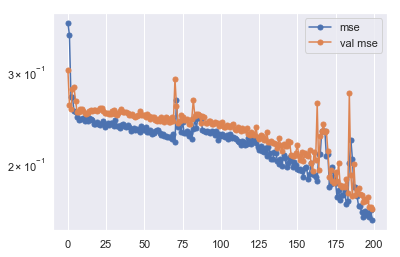

In [22]:
plt.yscale('log')
plt.plot(history.history['mean_squared_error'] ,ms=5,marker='o',label='mse')
plt.plot(history.history['val_mean_squared_error'] ,ms=5,marker='o',label='val mse')
plt.legend()
plt.show()

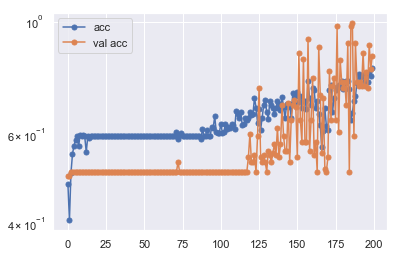

In [23]:
plt.yscale('log')
plt.plot(history.history['acc'] ,ms=5,marker='o',label='acc')
plt.plot(history.history['val_acc'] ,ms=5,marker='o',label='val acc')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)  # 輸出為機率
y_pred = np.where(y_pred > 0.5, 1, 0)  # 機率轉換為(1, 0)

In [25]:
accuracy_score(y_test, y_pred)

0.7098445595854922